In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [2]:
ad=pd.read_excel("Airlines+Data.xlsx")
ad

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
ad.shape

(96, 2)

In [5]:
ad.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
ad[ad.duplicated()]

,Month,Passengers


In [8]:
ad.set_index('Month', inplace=True)
ad

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<AxesSubplot:ylabel='Density'>

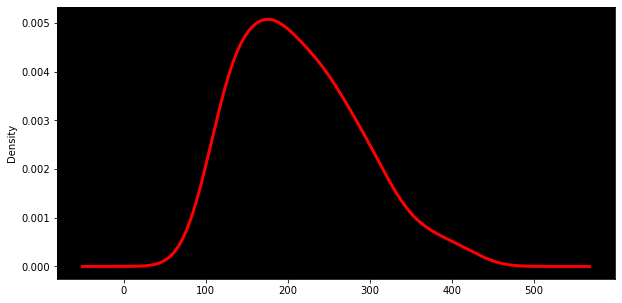

In [9]:
# density plot
ax=plt.axes()
ax.set_facecolor("black")
ad['Passengers'].plot(kind='kde',figsize=(10,5),color='red',linewidth=3)

<AxesSubplot:xlabel='Month'>

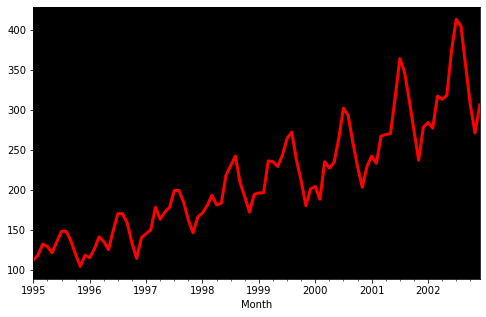

In [10]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
ax=plt.axes()
ax.set_facecolor("black")
ad['Passengers'].plot(figsize=(8,5),color='red',linewidth=3)

<AxesSubplot:>

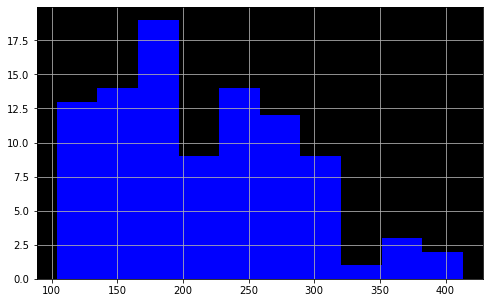

In [11]:
# Histogram
ax=plt.axes()
ax.set_facecolor("black")
ad['Passengers'].hist(figsize=(8,5),color='blue')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

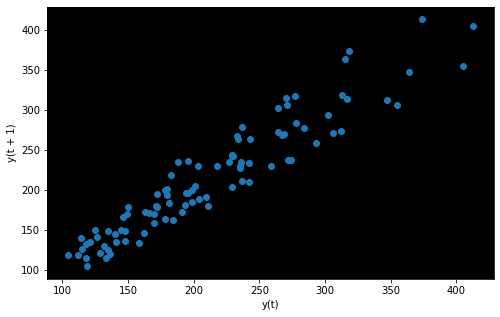

In [12]:
# Lagplot
from pandas.plotting import lag_plot

plt.figure(figsize=(8,5))
ax=plt.axes()
ax.set_facecolor("black")
lag_plot(ad['Passengers'])

C:\Users\dilsh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


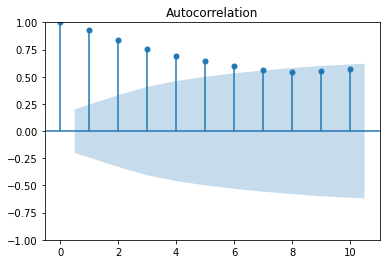

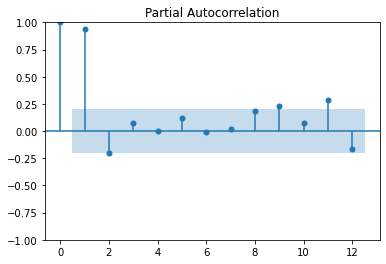

In [13]:
# lag plot
tsa_plots.plot_acf(ad.Passengers,lags=10)
tsa_plots.plot_pacf(ad.Passengers,lags=12)
plt.show()

# data driven forcating method

In [14]:
# splitting data into Train and Test
Train=ad.head(84)
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [15]:
Test=ad.tail(12)
Test

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355


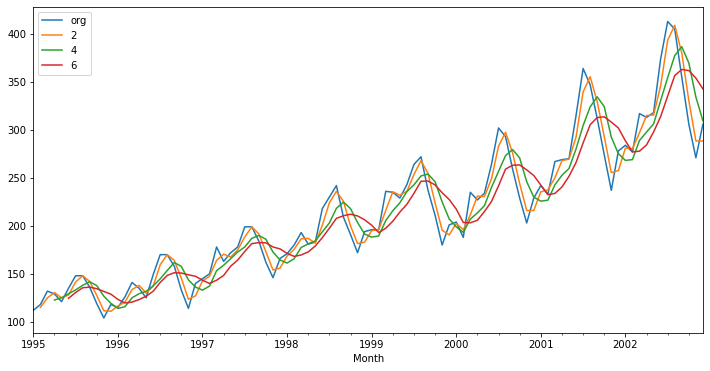

In [16]:
# moving average method
plt.figure(figsize=(12,6))
ad.Passengers.plot(label="org")
for i in range(2,8,2):
    ad["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc="best")

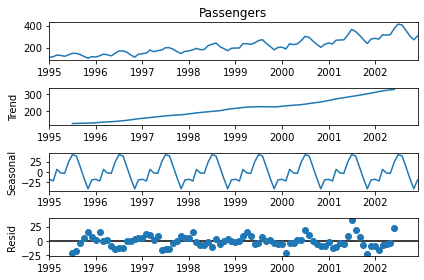

In [17]:
# tiem series decomposition plot
decompose_ts_add=seasonal_decompose(ad.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [18]:
def RMSE(org,pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# simple exponential method
ses_model=SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_ses_model=RMSE(Test.Passengers,pred_ses)
rmse_ses_model

68.00674031350329

In [24]:
# holt method
hw_model=Holt(Train["Passengers"]).fit()
pre_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_hw_model=RMSE(Test.Passengers,pre_hw)
rmse_hw_model

58.56209934996357

In [22]:
# holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add=ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_add_add_model=RMSE(Test.Passengers,pred_hwe_add_add)
rmse_hwe_add_add_model

63.07585545619695

In [23]:
hwe_model_mul_add=ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add=hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_model_mul_add_model=RMSE(Test.Passengers,pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

64.62220925087415

In [25]:
ads=ad.copy()
ads

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [26]:
# model based forcasting method & data preprocessing for models
ads["t"]=np.arange(1,97)
ads["t_squared"]=ads["t"]*ads["t"]
ads["log_Passengers"]=np.log(ads["Passengers"])
ads

,Passengers,t,t_squared,log_Passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


In [27]:
# splitting data into Train and Test
Train=ads.head(84)
Test=ads.tail(12)

In [28]:
# linear model
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model=RMSE(Test['Passengers'],pred_linear)
rmse_linear_model

53.19923653480269

In [29]:
# exponential model
Exp=smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model=RMSE(Test['Passengers'],np.exp(pred_Exp))
rmse_Exp_model

46.057361103156246

In [30]:
# quadratic Model
Quad=smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad=pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model=RMSE(Test['Passengers'],pred_Quad)
rmse_Quad_model

48.05188897933099

In [31]:
series=ad.copy()
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [32]:
# separate out a validation dataset
split_point=len(series)-12
dataset,validation=series[0:split_point],series[split_point:]
print('Dataset %d,Validation %d' % (len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 84,Validation 12


In [33]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [34]:
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [35]:
print(train.shape)
print(test.shape)

(60,)
(24,)


In [36]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
RMSE: 29.058


In [37]:
rmse_Persistence_model=29.058 

In [38]:
series=pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [39]:
# separate out a validation dataset
split_point=len(series)-12
dataset,validation=series[0:split_point],series[split_point:]
print('Dataset %d,Validation %d' % (len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 84,Validation 12


In [40]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [42]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [43]:
rmse_ARIMA_model = 24.650

In [44]:
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [46]:
from statsmodels.tsa.arima.model import ARIMA

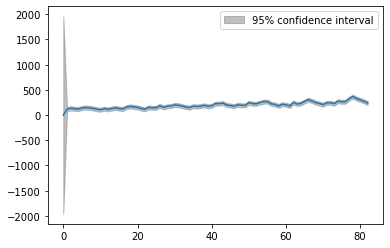

In [64]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=12)[0]
plot_predict(model_fit)
plt.show()

In [56]:
from statsmodels.graphics.tsaplots import plot_predict

In [60]:
# fit model
series=pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [61]:
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()

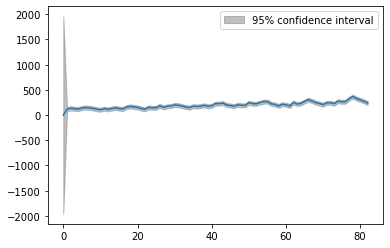

In [65]:
forecast=model_fit.forecast(steps=12)[0]
plot_predict(model_fit)
plt.show()

In [66]:
forecast

300.05256479730133

In [67]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['Persistence/ Base model', rmse_Persistence_model], ['ARIMA Model',rmse_ARIMA_model]]

In [68]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method,58.562099
2,HW exp smoothing add,63.075855
3,HW exp smoothing mult,64.622209
4,Linear Mode,53.199237
5,Exp model,46.057361
6,Quad model,48.051889
7,Persistence/ Base model,29.058000
8,ARIMA Model,24.650000


<AxesSubplot:xlabel='Model', ylabel='RMSE_Value'>

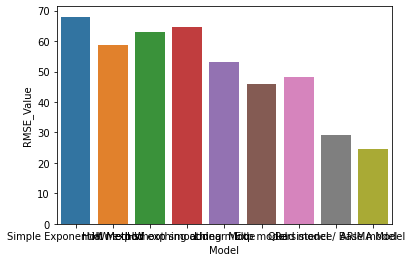

In [69]:
sns.barplot(data=df,x='Model',y='RMSE_Value')